# Adam Optimization Algorithm From Scratch

Gradient descent is an optimization algorithm that follows the negative gradient of an objective function in order to locate the minimum of the function.

A limitation of gradient descent is that a single step size (learning rate) is used for all input variables. Extensions to gradient descent like AdaGrad and RMSProp update the algorithm to use a separate step size for each input variable but may result in a step size that rapidly decreases to very small values.

The <b>Adaptive Movement</b> Estimation algorithm, or <b>Adam</b> for short, is an extension to gradient descent and a natural successor to techniques like AdaGrad and RMSProp that automatically adapts a learning rate for each input variable for the objective function and further smooths the search process by using an exponentially decreasing moving average of the gradient to make updates to variables.

Adam is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

This is achieved by calculating a step size for each input parameter that is being optimized. Importantly, each step size is automatically adapted throughput the search process based on the gradients (partial derivatives) encountered for each variable.

This involves maintaining a first and second moment of the gradient, e.g. an exponentially decaying mean gradient (first moment) and variance (second moment) for each input variable.

<b>The moving averages themselves are estimates of the 1st moment (the mean) and the 2nd raw moment (the uncentered variance) of the gradient.</b>

The moment vector and exponentially weighted infinity norm for each parameter being optimized as part of the search, referred to as m and v (really the Greek letter nu) respectively. They are initialized to 0.0 at the start of the search.

m = 0
v = 0

The algorithm is executed iteratively over time t starting at t=1, and each iteration involves calculating a new set of parameter values x, e.g. going from x(t-1) to x(t).

First, the gradient (partial derivatives) are calculated for the current time step.

$g(t) = f'(x(t-1))$

Next, the first moment is updated using the gradient and a hyperparameter beta1.

$m(t) = \beta1 * m(t-1) + (1 – \beta1) * g(t)$

Then the second moment is updated using the squared gradient and a hyperparameter beta2.

$v(t) = \beta2 * v(t-1) + (1 – \beta2) * g(t)^2$

The first and second moments are biased because they are initialized with zero values.

Next the first and second moments are bias-corrected, starring with the first moment:

$\hat{m}(t) = \displaystyle\frac{m(t)}{(1 – \beta1(t))}$

$\hat{v}(t) = \displaystyle\frac{v(t)}{(1 – \beta2(t))}$


Note, \beta1(t) and \beta2(t) refer to the beta1 and beta2 hyperparameters that are decayed on a schedule over the iterations of the algorithm. A static decay schedule can be used, although the paper recommend the following:

$beta1(t) = beta1^t$<br>
$beta2(t) = beta2^t$

Finally, we can calculate the value for the parameter for this iteration.

$x(t) = x(t-1) – \alpha * \displaystyle\frac{\hat{m}(t)}{\sqrt{\hat{v}(t)) + \epsilon}}$

Where alpha is the step size hyperparameter, eps is a small value (epsilon) such as 1e-8 that ensures we do not encounter a divide by zero error, and sqrt() is the square root function.

Note, a more efficient reordering of the update rule listed in the paper can be used:

$alpha(t) = \alpha * \displaystyle\frac{\sqrt{1 – \beta2(t)}}{{(1 – \beta1(t)}}$ <br>
$x(t) = x(t-1) – \displaystyle\frac{\alpha(t) * m(t)}{\sqrt{v(t)) + \epsilon)}}$

To review, there are three hyperparameters for the algorithm, they are:

$\bullet$<b>$\alpha$</b>: Initial step size (learning rate), a typical value is 0.001.<br>
$\bullet$<b>$\beta1$</b>: Decay factor for first momentum, a typical value is 0.9.<br>
$\bullet$<b>$\beta2$</b>: Decay factor for infinity norm, a typical value is 0.999.<br>

## Gradient Descent With Adam

### Two-Dimensional Test Problem

In [1]:
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from numpy.random import seed
from math import sqrt
from numpy import asarray
from numpy.random import rand

In [2]:
# objective function
def obj_func(x, y):
    return x**2.0 + y**2.0

<ipython-input-3-1c660767ae42>:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


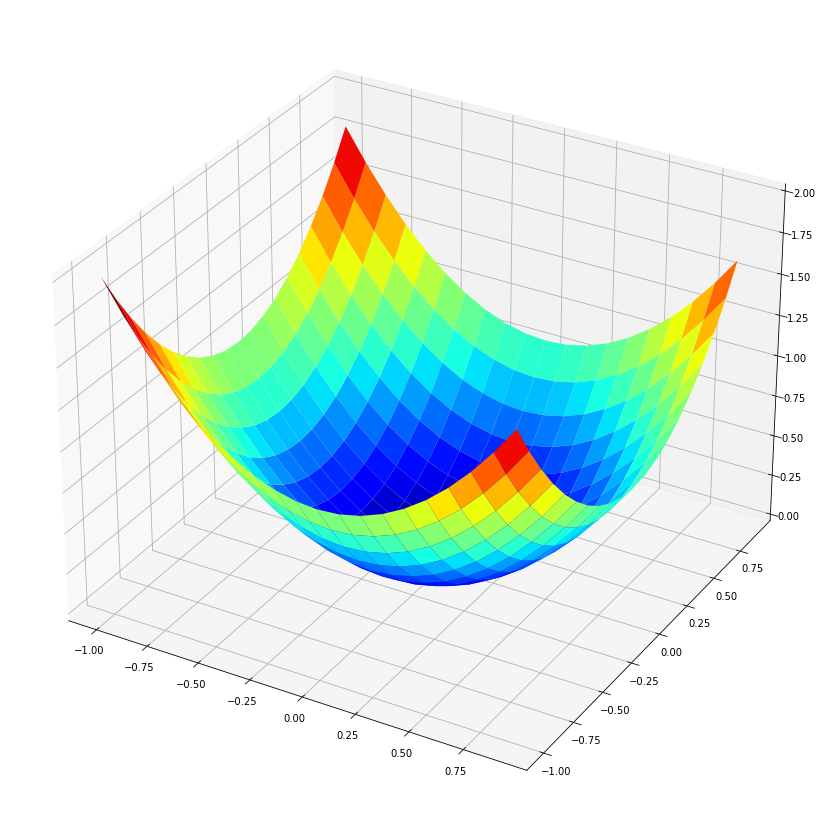

In [3]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = obj_func(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure(figsize = (15,15))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

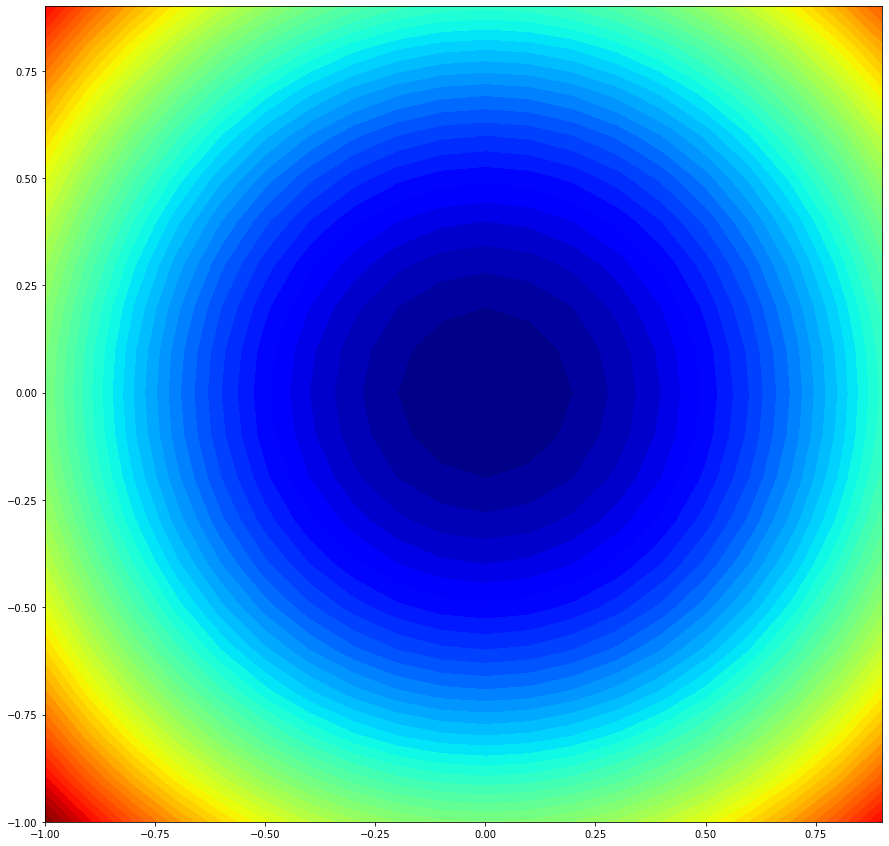

In [4]:
pyplot.figure(figsize = (15,15))
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [5]:
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

In [6]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]

In [8]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(obj_func, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

## Visualization of Adam

In [9]:
# gradient descent algorithm with adam
def adam2(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = list()
    score_list = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        score_list.append(score)
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return solutions, score_list

In [26]:
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions, score_list = adam2(obj_func, derivative, bounds, n_iter, alpha, beta1, beta2)

>0 f([-0.35315164  0.36464523]) = 0.25768
>1 f([-0.33322012  0.34471138]) = 0.22986
>2 f([-0.31340727  0.32489201]) = 0.20378
>3 f([-0.2937663  0.3052382]) = 0.17947
>4 f([-0.2743529   0.28580329]) = 0.15695
>5 f([-0.25522478  0.26664244]) = 0.13624
>6 f([-0.23644103  0.247812  ]) = 0.11732
>7 f([-0.21806146  0.22936889]) = 0.10016
>8 f([-0.20014583  0.21136994]) = 0.08474
>9 f([-0.1827531   0.19387115]) = 0.07098
>10 f([-0.16594054  0.17692694]) = 0.05884
>11 f([-0.14976289  0.16058934]) = 0.04822
>12 f([-0.13427146  0.14490726]) = 0.03903
>13 f([-0.11951323  0.12992569]) = 0.03116
>14 f([-0.10553001  0.11568491]) = 0.02452
>15 f([-0.09235763  0.10221984]) = 0.01898
>16 f([-0.08002521  0.08955938]) = 0.01442
>17 f([-0.0685546   0.07772587]) = 0.01074
>18 f([-0.05795985  0.06673469]) = 0.00781
>19 f([-0.04824699  0.05659396]) = 0.00553
>20 f([-0.03941388  0.04730442]) = 0.00379
>21 f([-0.03145031  0.03885941]) = 0.00250
>22 f([-0.02433824  0.03124515]) = 0.00157
>23 f([-0.01805232  0.0

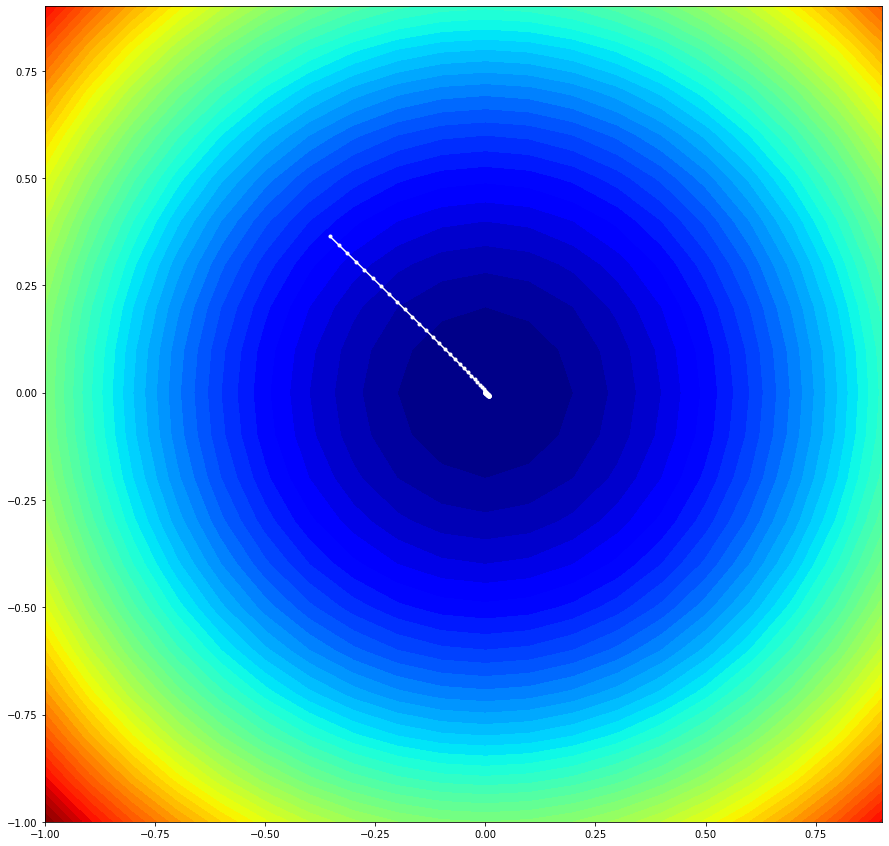

In [29]:
# create a filled contour plot with 50 le[vels and jet color scheme
pyplot.figure(figsize = (15,15))
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# plot the sample as white circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

In [36]:
# define the total iterations
n_iter = 100
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions2, score_list = adam2(obj_func, derivative, bounds, n_iter, alpha, beta1, beta2)

>0 f([ 0.36375423 -0.34896874]) = 0.25410
>1 f([ 0.34382055 -0.3290381 ]) = 0.22648
>2 f([ 0.32400167 -0.30922775]) = 0.20060
>3 f([ 0.30434882 -0.28959168]) = 0.17649
>4 f([ 0.28491553 -0.27018651]) = 0.15418
>5 f([ 0.26575713 -0.25107093]) = 0.13366
>6 f([ 0.24693018 -0.2323051 ]) = 0.11494
>7 f([ 0.22849182 -0.21394992]) = 0.09798
>8 f([ 0.2104991  -0.19606631]) = 0.08275
>9 f([ 0.19300823 -0.17871436]) = 0.06919
>10 f([ 0.17607385 -0.16195245]) = 0.05723
>11 f([ 0.15974819 -0.14583636]) = 0.04679
>12 f([ 0.14408035 -0.1304183 ]) = 0.03777
>13 f([ 0.12911545 -0.11574602]) = 0.03007
>14 f([ 0.1148939  -0.10186187]) = 0.02358
>15 f([ 0.1014507  -0.08880199]) = 0.01818
>16 f([ 0.08881476 -0.07659555]) = 0.01375
>17 f([ 0.0770084 -0.0652641]) = 0.01019
>18 f([ 0.06604692 -0.05482113]) = 0.00737
>19 f([ 0.05593828 -0.04527176]) = 0.00518
>20 f([ 0.04668302 -0.03661264]) = 0.00352
>21 f([ 0.03827425 -0.02883209]) = 0.00230
>22 f([ 0.03069785 -0.02191036]) = 0.00142
>23 f([ 0.02393285 -0.0

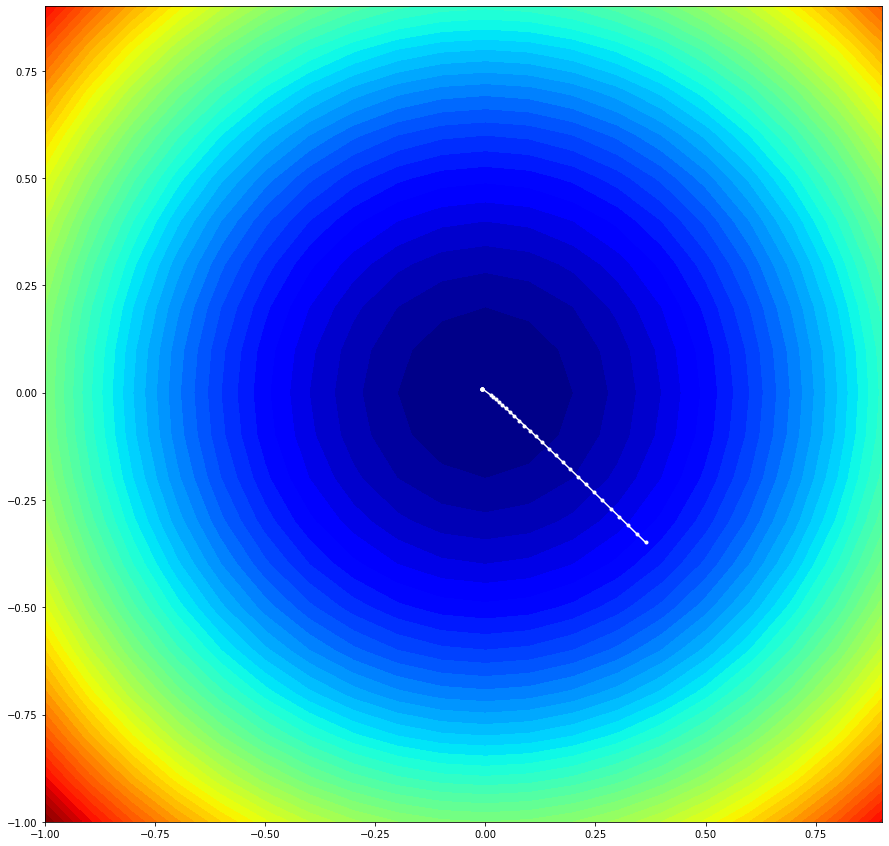

In [42]:
#Stopping at score <= 0.0001

solution_quick = [x for x,y in zip(solutions2,score_list) if y >=0.0001]

# create a filled contour plot with 50 levels and jet color scheme
pyplot.figure(figsize = (15,15))
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# plot the sample as white circles
solution_quick = asarray(solution_quick)
pyplot.plot(solution_quick[:, 0], solution_quick[:, 1], '.-', color='w')

In [43]:
len(solution_quick)

33